# Práctica 2 de Estadística para Data Science


## Problema 1

Considera un examen de 10 preguntas con 5 posibles respuestas para cada pregunta en el que se responde al azar.  
Considera la variable aleatoria X = numero de preguntas acertadas en el examen.

In [ ]:
# Esta es una binomial con estos parametros

preguntas  <- 10
probabilidad <- 0.2

In [ ]:
# Valor esperado

esperado <- preguntas*probabilidad

print(paste("El valor esperado es:",esperado))

In [ ]:
# Desviación típica

desv <- sqrt(esperado*(1 - probabilidad))

print(paste("La desviación típica es:",sqrt(desv)))

In [ ]:
# Las probabilidades, por separado

prob.vec <- dbinom(0:10,preguntas,probabilidad)

print("La probabilidad de acertar:")
for (i in 0:10){
    print(paste(i,"respuestas:",prob.vec[i+1]))
}

print(paste("Y por suerta la suma de esas probabilidades es:", sum(prob.vec)))

In [ ]:
# Las probabilidades de acertar al menos i preguntas

prob.cumulative <- pbinom(0:10,preguntas,probabilidad)

print("La probabilidad de acertar al menos:")
for (i in 0:10){
    print(paste(i,"respuestas:",prob.cumulative[i+1]))
}

In [ ]:
# Ahora pintamos las probabilidades

plot(0:10,prob.vec)

plot(0:10,prob.cumulative)

## Problema 2

In [1]:
library("tidyverse")

got <- read_csv("GOT.csv")

str(got)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Season = col_double(),
  Episode = col_double(),
  NumDeaths = col_double()
)



Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	67 obs. of  4 variables:
 $ X1       : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Season   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Episode  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ NumDeaths: num  4 3 0 1 5 4 2 7 2 3 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   Season = col_double(),
  ..   Episode = col_double(),
  ..   NumDeaths = col_double()
  .. )


In [2]:
total.deaths <- sum(got$NumDeaths)
total.deaths

[1] 215

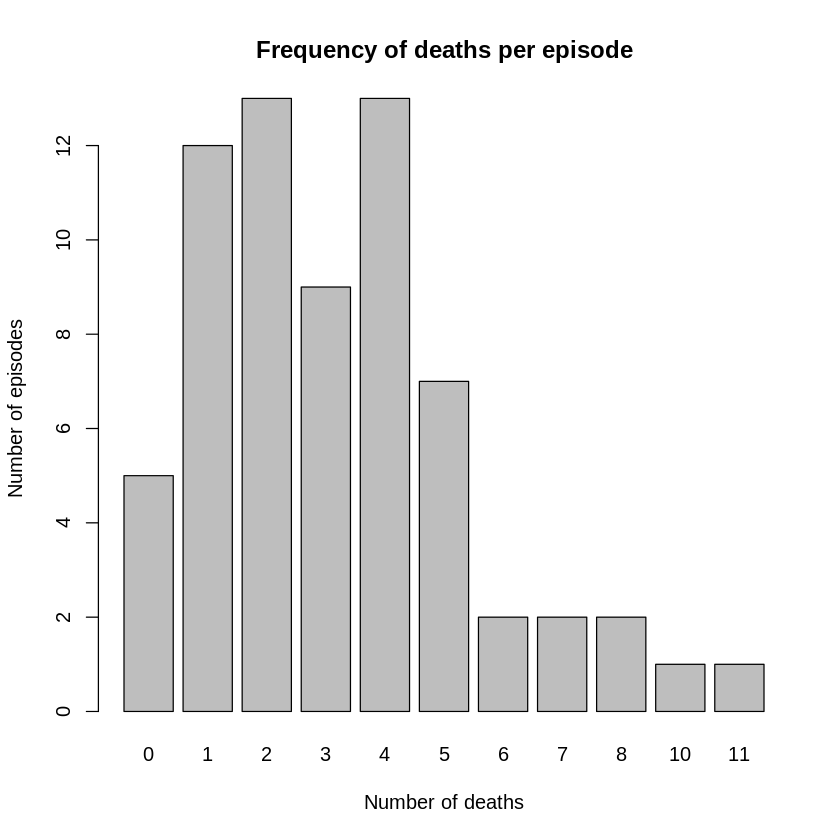

In [18]:
# Miramos como se distribuye el número de muertes por episodio
death.table <- table(got$NumDeaths)

barplot(death.table, xlab="Number of deaths", ylab="Number of episodes",
       main = "Frequency of deaths per episode")

In [21]:
# Esta es una distribución de Poisson
# Sacamos los valores clave de la distrubución

# lambda = valor medio de la distribución
lambda <- mean(got$NumDeaths)
print(lambda)

[1] 3.208955


Para que haya más de 4 muertes, hacemos:
(1 - probabilidad que haya 4 muertes o menos).

In [30]:
p.4 <- (1 - ppois(4, lambda))
print(paste("La probabilidad de que haya más de 4 muertos es",p.4*100,"%"))

[1] "La probabilidad de que haya más de 4 muertos es 22.0984128004514 %"


Para poder usar una distribución de Poisson, hay que asumir que los eventos son ocurren independientes del tiempo discurrido desde el evento anterior. 
Eso puede ser falso, ya que siendo una serie de televisión, se suelen agrupar eventos "interesantes", como por ejemplo la muerte de personajes importantes, al final de la temporada.

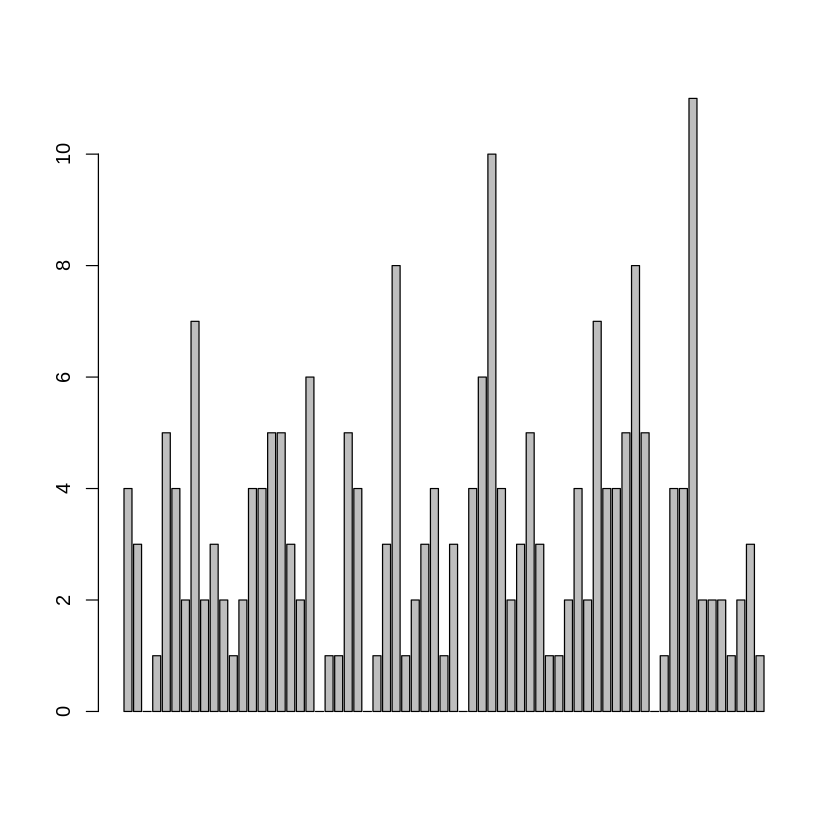

In [31]:
death.episode <- tapply(got$NumDeaths)

barplot(got$NumDeaths)